<a href="https://colab.research.google.com/github/paulsoriiiano/cmpe-256-project/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA and Data Preprocessing

In [1]:
# Get data folder
!git clone https://github.com/paulsoriiiano/cmpe-256-project
!mv cmpe-256-project/data .
!rm -rf cmpe-256-project

Cloning into 'cmpe-256-project'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 16 (delta 3), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (16/16), 21.61 MiB | 13.57 MiB/s, done.
Resolving deltas: 100% (3/3), done.
mv: cannot move 'cmpe-256-project/data' to './data': Directory not empty


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Data folder should be available on Colab notebook
df = pd.read_csv("data/train_2_long.csv")
df.head()

,user_id,item_id
0,0,28261
1,0,388
2,0,5731
3,0,401
4,0,28284


## EDA

In [3]:
# Count number of unique values
n_unique = df.nunique()
print(f"There are {n_unique["user_id"]} unique users and {n_unique["item_id"]} unique items.")
n_unique

There are 52643 unique users and 91599 unique items.


,0
user_id,52643
item_id,91599


In [4]:
# Check for duplicates
print(f"There are {df.duplicated().sum()} duplicates in the data.")

There are 0 duplicates in the data.


In [5]:
# Check distribution per user
total_items = df.groupby(by="user_id").count().sort_values(by="item_id", ascending=False).rename(columns={"item_id": "count"})
total_items.mean()

,0
count,45.224056


In [11]:
# Check global average interactions of users.
total_items = df.groupby(by="user_id").count().sort_values(by="item_id", ascending=False).rename(columns={"item_id": "count"})
print(f"The average user interacted with {total_items.mean()["count"]: .2f} items")
total_items

The average user interacted with  45.22 items


,count
user_id,
150,10682
4352,3839
30,2785
1252,2336
3696,1987
...,...
41368,16
41372,16
41373,16


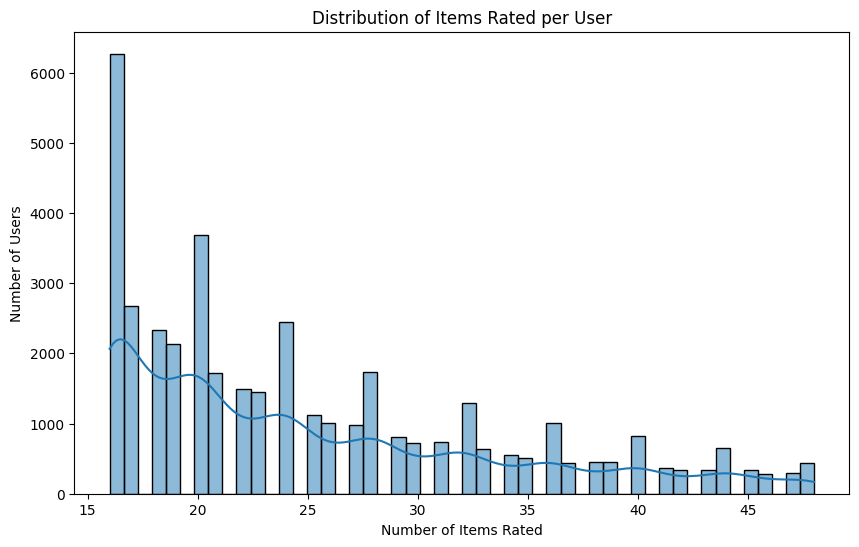

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

total_items = total_items.loc[100:]
sns.histplot(total_items['count'], bins=50, kde=True)
plt.title('Distribution of Items Rated per User')
plt.xlabel('Number of Items Rated')
plt.ylabel('Number of Users')
plt.show()

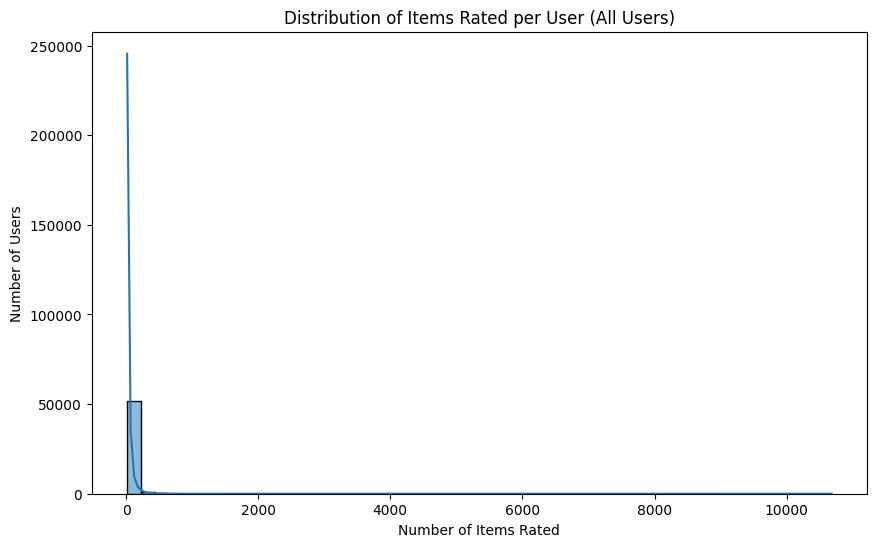

In [44]:
# Regenerate total_items to include all users
total_items = df.groupby(by="user_id").count().sort_values(by="item_id", ascending=False).rename(columns={"item_id": "count"})

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(total_items['count'], bins=50, kde=True)
plt.title('Distribution of Items Rated per User (All Users)')
plt.xlabel('Number of Items Rated')
plt.ylabel('Number of Users')
plt.show()

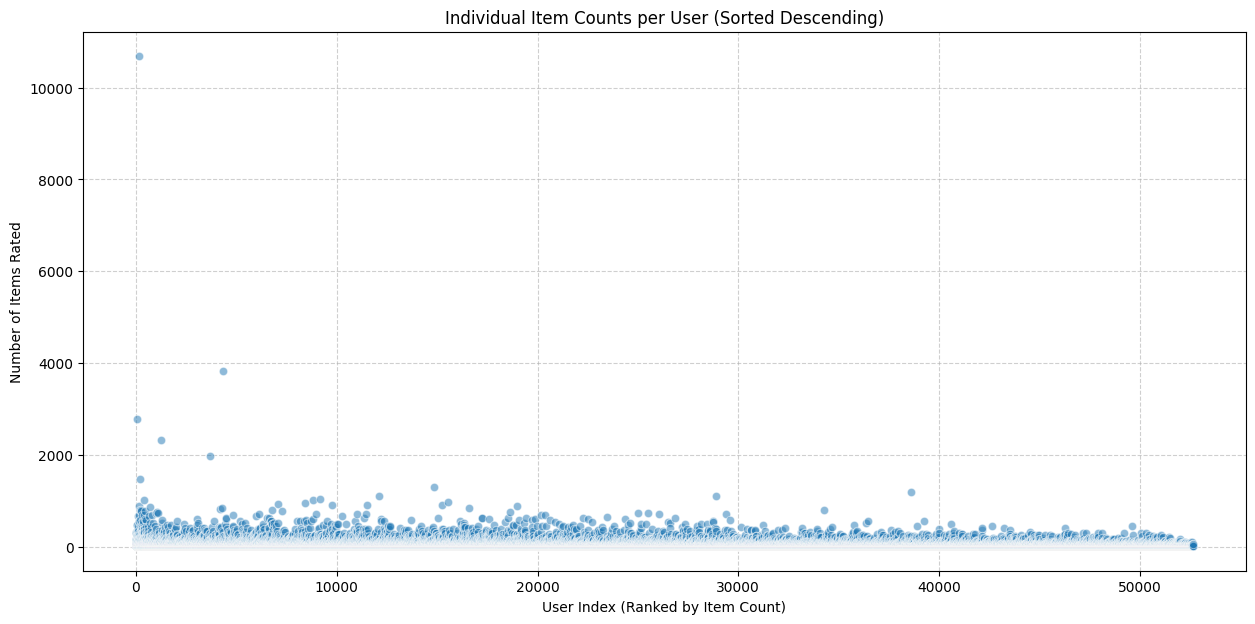

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure total_items is reset to include all users and sorted by count
total_items = df.groupby(by="user_id").count().sort_values(by="item_id", ascending=False).rename(columns={"item_id": "count"})

plt.figure(figsize=(15, 7))
# Plotting the 'count' directly against its index (which represents the rank due to sorting)
sns.lineplot(x=total_items.index, y=total_items['count'], marker='o', linestyle='none', alpha=0.5)
plt.title('Individual Item Counts per User (Sorted Descending)')
plt.xlabel('User Index (Ranked by Item Count)')
plt.ylabel('Number of Items Rated')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()